<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AIB / SECTION 4 / SC43x 

---



# Major Neural Network Architectures

이번 한 주간 CNN, U-Net, Autoencoder, GAN 등 다양한 주요 신경망 구조들에 대해서 배워봤습니다. 오늘은 그 모델들을 복습하는 시간을 가지도록 하겠습니다. 이 SC는 **신경망의 다양한 구조에 대한 이해와 지식**을 평가합니다. **모델을 높은 정확도를 가지도록 학습 시킬 수 있는지를 평가하려는 것이 아닙니다.**

아래의 방식들은 복잡한 연산을 요구합니다. 모든 파트의 문제들은 어떤 환경에서라도 (e.g. 로컬 주피터, Google Colab, etc.) 5-10분 내외로 결과값이 나오도록 제작이 됐기 때문에 만일 결과값을 도출하는데 그 이상의 시간이 걸린다면 여러분의 접근 방식을 재점검해보시기 바랍니다.

---

## 1. CNN

### 이미지 분류
Keras와  [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained)을 활용하여 `im_frog` 폴더에 있는 이미지 중 어떤 이미지에 개구리가 있는지 찾는 이미지 분류 모델을 작동시켜 보겠습니다.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

## 2.1 Resnet$V_2$을 사용하기 위해서 전처리 함수를 사용하여 이미지를 전처리 하고 이미지들의 사이즈를 재조정하는 함수를 정의해봅시다.

In [45]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- **파일 경로와 이름을 불러옵니다.**

In [46]:
import os

frog_dir = "/content/drive/MyDrive/Colab Notebooks/im_frog"

In [47]:
"""Hint : os 패키지 내에 파일 이름을 불러올 수 있는 메서드를 사용합니다."""

filenames = os.listdir(frog_dir)
print(filenames)

['joel-henry-Rcvf6-n1gc8-unsplash.jpg', 'elizabeth-explores-JZybccsrB-0-unsplash.jpg', 'yanna-zissiadou-SV-aMgliWNs-unsplash.jpg', 'drew-brown-VBvoy5gofWg-unsplash.jpg', 'mche-lee-j-P8z4EOgyQ-unsplash.jpg', 'serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg', 'jared-evans-VgRnolD7OIw-unsplash.jpg', 'jacky-watt-92W5jPbOj48-unsplash.jpg', 'ed-van-duijn-S1zA6AR50X8-unsplash.jpg', 'cristiane-teston-bcnfJvEYm1Y-unsplash.jpg', 'zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg', 'saturday_sun-_q37Ca0Ll4o-unsplash.jpg', 'priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg', 'matthew-kosloski-sYkr-M78H6w-unsplash.jpg', 'marcus-neto-fH_DOdTt-pA-unsplash.jpg']


- **필요한 라이브러리 import 후 이미지를 불러와 예측하는 함수를 정의합니다.**

In [48]:
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

import numpy as np

In [49]:
img = load_img(frog_dir + '/' + filenames[0])
img_arr = img_to_array(img)
img_arr.shape

(4000, 6000, 3)

In [58]:
img_re = tf.image.resize(img_arr,(224, 224))
img_re.shape

TensorShape([224, 224, 3])

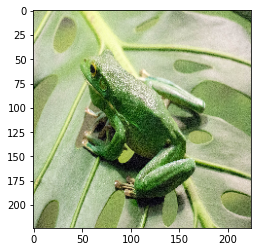

In [59]:
import matplotlib.pyplot as plt

plt.imshow(tf.keras.preprocessing.image.array_to_img(img_re))

In [60]:
def load_and_preprocessing(base_dir, name, model):
    """
    이미지 1장을 받아 모델로 예측한 뒤
    가장 확률이 높은 클래스 번호를 출력하는 함수입니다.
    
    Hint:
        1. 
        2. array의 값을 직접 나누어 픽셀 값을 정규화합니다.
        
    Args:
        base_dir : 이미지 파일이 있는 경로입니다.
        name : 이미지 파일의 이름입니다.
        model : 예측에 사용할 모델입니다.
    """
    image_path = base_dir + '/' + name
    image = load_img(image_path)
    input_arr = img_to_array(image) / 255
    input_arr = tf.image.resize(input_arr,(224, 224))
    
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) # 확률이 가장 높은 클레스의 번호 출력
    print(predict_class[0])

    return predict_class[0], input_arr

## 2.2 ResNet50v2 모델을 사용해 이미지 분류(예측)를 진행합니다. 예측 결과는 자유롭게 출력해봅니다.
> 참고: `ResNet50v2`는 "frog"로 예측하지 않습니다. "frog"의 label은 "bullfrog, treefrog, tailed frog"입니다

In [61]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

resnetV2 = ResNet50V2(weights='imagenet', include_top = True, input_shape=(224,224,3))
# resnetV2.summary()

- **기존에 정의한 함수(`load_and_preprocessing`)를 사용하여 이미지 분류를 진행하여봅니다.**

In [62]:
# 출력되는 클래스의 번호를 모두 리스트에 저장하여 predict_class 에 할당합니다.

predict_class = [load_and_preprocessing(frog_dir, filename, resnetV2) for filename in filenames]

31
807
113
30
985
985
32
868
308
309
31
58
58
397
738


- **클래스의 이름을 다운받아 출력하여봅니다.**

In [55]:
!git clone https://github.com/anishathalye/imagenet-simple-labels.git

fatal: destination path 'imagenet-simple-labels' already exists and is not an empty directory.


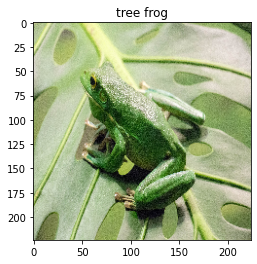

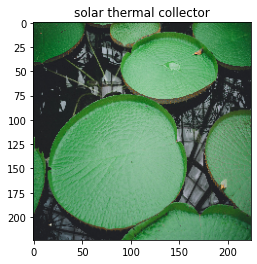

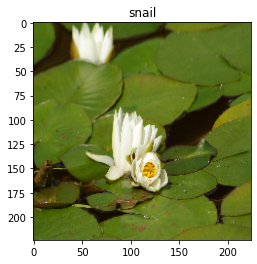

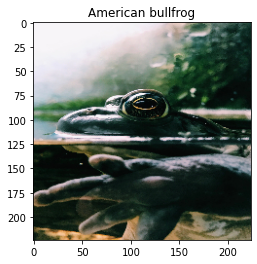

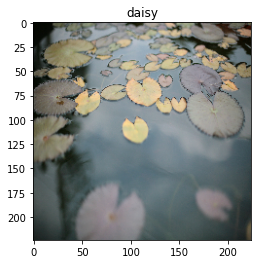

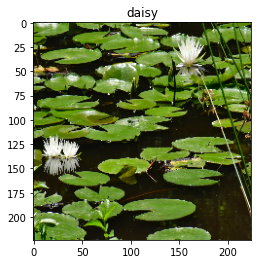

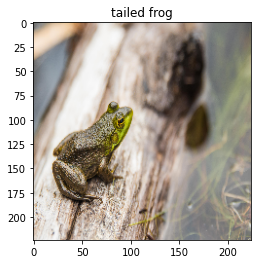

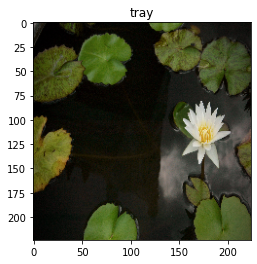

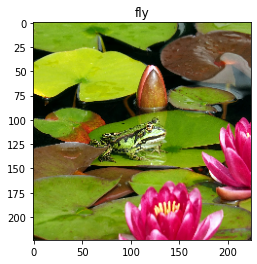

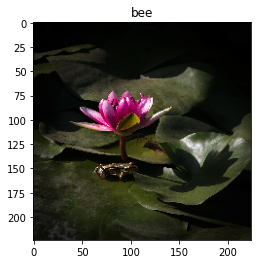

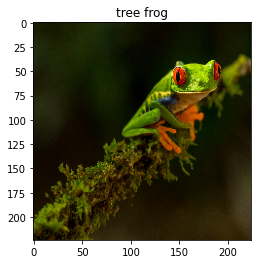

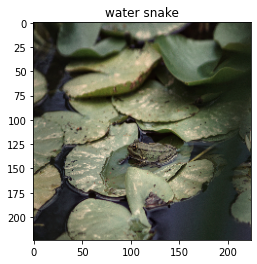

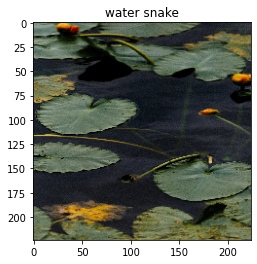

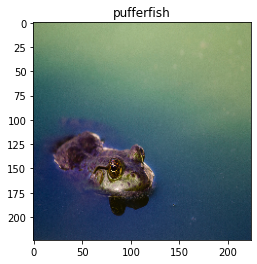

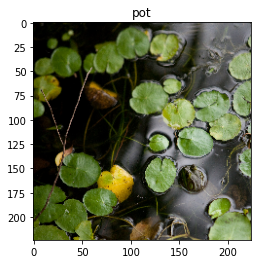

In [69]:
import json

with open ('/content/imagenet-simple-labels/imagenet-simple-labels.json') as f:
    labels = json.load(f)

# fig, ax = plt.subplots(len(predict_class),1)

for i, img in predict_class:
    plt.figure()
    plt.title(labels[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    plt.show()

---

## 2. U-Net

Lecture Note에서는 U-Net의 백본(backbone)모델로 `MobileNetV2`를 사용하여 segmentation을 수행하였습니다.<br/>
이번 SC에서는 ResNet50을 백본으로 하여 같은 문제를 풀어보세요.

참고로 resnet에서의 block은 아래 예시의 3개의 레이어를 참조하여 만들어주세요.<br/>
예시는 16x16 까지만 나타나 있지만 Lecture Note 와 같이 4x4까지 만들어 주어야 모델을 완성할 수 있습니다.

```
    'conv1_relu', # 64x64
    'conv2_block3_out', # 32x32 
    'conv3_block4_out', # 16x16
```

In [29]:
# 이 곳에 답안을 작성해 주시기 바랍니다.
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-l54sxbfx
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-l54sxbfx
  Created wheel for tensorflow-examples: filename=tensorflow_examples-189c662d500c20b9f9e93fef0af97d5311e64377_-py3-none-any.whl size=268428 sha256=b1c7f220877c6d84aac26244013d93c7a4c0a5cbdd2f4ee68f18577321007744
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ecv7rcv/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 4.1 MB 5.4 MB/s 


In [30]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [31]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

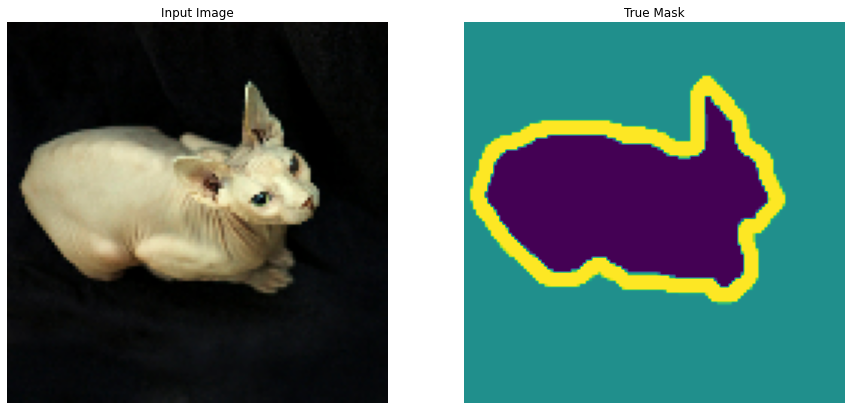

In [32]:
def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

In [35]:
OUTPUT_CHANNELS = 3

base_model = tf.keras.applications.resnet50.ResNet50(input_shape=[128, 128, 3], include_top=False)

layer_names = [
    'conv1_relu', # 64x64
    'conv2_block3_out', # 32x32 
    'conv3_block4_out', # 16x16
]
layers = [base_model.get_layer(name).output for name in layer_names]


down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

94781440/94765736 [==============================] - 2s 0us/step


In [36]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [37]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling을 진행하는 부분입니다.
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling을 진행하는 부분입니다.
    for up, skip in zip(up_stack, skips):
        x = up(x)
        # Downsampling 결과를 Concatenate 해줍니다.
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [39]:
model = unet_model(OUTPUT_CHANNELS)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 64)  1460096     ['input_4[0][0]']                
                                , (None, 32, 32, 25                                               
                                6),                                                               
                                 (None, 16, 16, 512                                               
                                )]                                                          

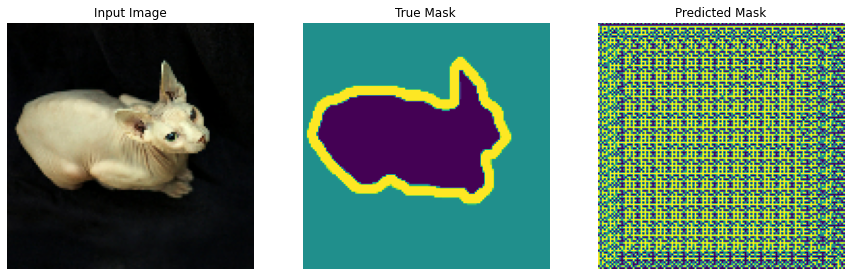

In [40]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

show_predictions()

In [41]:
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

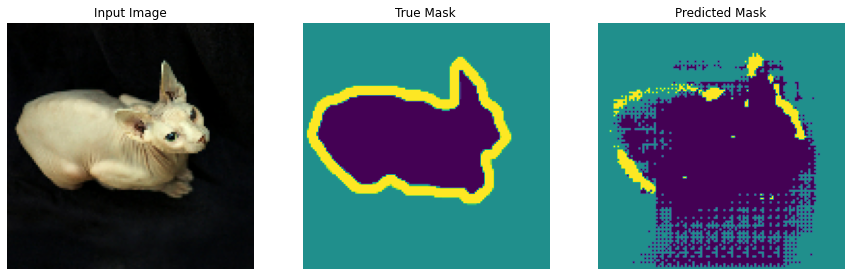


에포크 이후 예측 예시 20

57/57 [==============================] - 62s 1s/step - loss: 0.6079 - accuracy: 0.7458 - val_loss: 0.6350 - val_accuracy: 0.7346


In [42]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

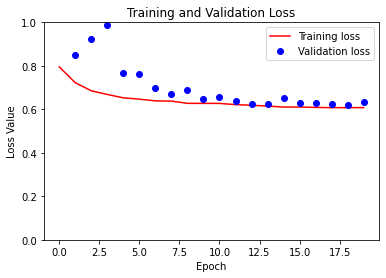

In [43]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

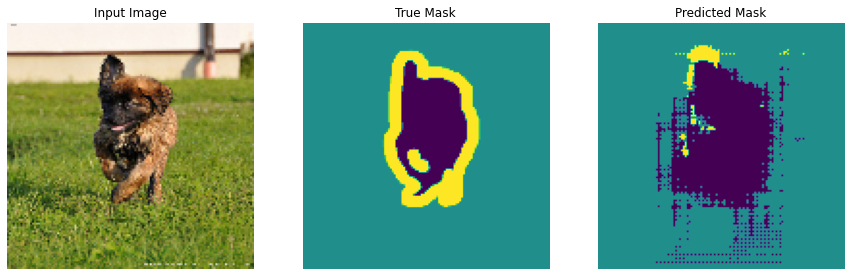

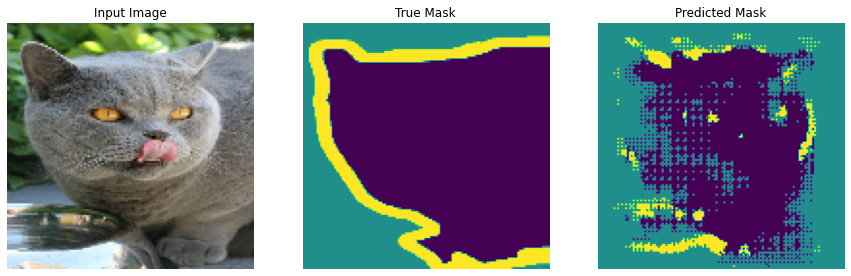

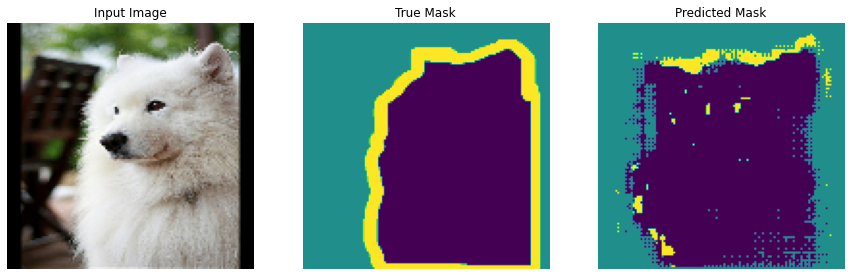

In [44]:
show_predictions(test_dataset, 3)

## 3. Free Response
> 동료들에게 설명한다고 생각하고 간단하게 몇 문장으로 작성하세요.

### 3.1 딥러닝이 왜 중요하다고 생각하시나요?

모델만 잘 구성하고 학습시킨다면, 인간이 잘 해결하지 못하는 복잡한 문제를 딥러닝이 해결할 수 있기 때문에.

### 3.2 딥러닝의 다양한 분야 중에서 좀 더 심도있게 배우고 싶은 분야는 무엇인가요? 왜 그렇게 생각하시나요?

딥러닝의 원리를 더 잘 이해하고, 나중엔 내가 만들고 싶은 모델을 만들 수 있도록 공부해보고 싶습니다. 딥러닝 자체가 문제의 종류에 따라 모델의 구조가 달라지는데, 경쟁력 있는 모델을 만들기 위해서는 스스로 모델을 설계하고 구현할 수 있는 능력이 필수적일 것 같습니다.

### 3.3 인공지능이 우리 사회에서 대체할 수 있는 직업이 무엇이라고 생각하시나요?


전화 응대 서비스, 주식 trader, 팩트를 위주로 전달해주는 뉴스 기자 등

### 3.4 반대로 인공지능 때문에, 딥러닝 때문에 더 생겨날 직업은 무엇이 있을까요?


인공지능 윤리 관리자, 맞춤 인공지능 모델 구현 전문직 및 자격증, 업무 자동화 및 인공지능화 컨설턴트 등등

### 3.5 여러분이 생각하실 때 Strong AI라고 불리우는 [일반 인공지능 (Artificial General Intelligence)](https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%B5_%EC%9D%BC%EB%B0%98_%EC%A7%80%EB%8A%A5)을 개발해내는 것이 가능할 것 같나요? 왜 그렇게 생각하시나요?

아직은 멀었지만, 미래엔 가능할 것이라 생각합니다. 인간의 인지능력 또한 신경망 다발이 물리적으로 연결된 것이기 때문에, 이를 모방하는 방법으로든, 다른 방법으로든 가능할 것이라 생각합니다.

### 3.6 Coutinous learning에 대해서 조사해보고 인지한 부분에 대해서 작성해보세요.

이미 학습된 모델이 새로 추가된 데이터를 학습해야 하는 경우 기존에 학습했던 데이터에 대한 학습 성능을 잃지 않거나 오히려 이를 활용하여 추가데이터를 학습할 수 있도록 하는 학습법. 이를 위한 방법으로는 Selective Re-training, Dynamic Expansion, Split and Duplication 등이 있다.

# Advanced Goals: 3점을 받기 위해서는 아래의 조건 중에서 3개 이상을 달성하셔야 합니다

### 1
    - 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
    - 이미지를 예측한 label과 같이 출력해보세요
    - 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되어있어야 합니다)
### 2
    - U-Net 을 직접 구현하여 동일한 문제를 수행해보세요. 
### 3
    - 작성한 답안을 몇 문장보다 조금 더 상세하게 작성해보세요
    - 왜 그렇게 생각하게 되었는 지 관련 근거를 서술하세요.
### 추가과제
    - GAN을 이용한 프로젝트를 새롭게 구현해보세요.